In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.gridspec import GridSpec

from get_data import create_dataframe

In [20]:
username = "'Tiago'"

df = create_dataframe(username)

Category: Alimentação
Type: Café
Category: Alimentação
Type: Kebab
Category: Alimentação
Type: Lanche
Category: Alimentação
Type: McDonalds
Category: Contas
Type: Água
Category: Contas
Type: Dívidas
Category: Contas
Type: Luz
Category: Contas
Type: Moche
Category: Contas
Type: Nos
Category: Contas
Type: Passe
Category: Gastos
Type: Café
Category: Gastos
Type: Comboio
Category: Gastos
Type: Compras
Category: Gastos
Type: Férias
Category: Gastos
Type: Geral
Category: Gastos
Type: Gulodices
Category: Gastos
Type: Lanche
Category: Gastos
Type: Refeições
Category: Gastos
Type: Shopping
Category: Gastos
Type: Transporte
Category: Gastos
Type: Trotinete
Category: Gastos
Type: Uber
Category: Gym
Type: Abdutor
Category: Gym
Type: Abs
Category: Gym
Type: Adutor
Category: Gym
Type: Aulas
Category: Gym
Type: Bench Press
Category: Gym
Type: Chest Press
Category: Gym
Type: Delt Post
Category: Gym
Type: Geral
Category: Gym
Type: Prenda 45
Category: Gym
Type: Prensa
Category: Gym
Type: Pull Down
Categ

In [21]:
categories = df['Category'].unique()

In [22]:
# create a dataframe for each category
df_categories = list()
for category in categories:
    df_category = df.loc[df['Category'] == category].copy()
    df_categories.append(df_category)
    
# convert Value to float if possible, else keep it as string
for df_category in df_categories:
    first_Value = df_category['Value'].iloc[0]
    #check if first Value is convertible to float
    try:
        float(first_Value)
        df_category['Value'] = df_category['Value'].astype('float64')
    except ValueError:
        pass 

In [23]:
def get_category_df(df_categories, category):
    df_category = df_categories[categories.tolist().index(category)]
    return df_category

def get_type_df(df_category, type):
    df_type = df_category.loc[df_category['Type'] == type]
    return df_type

In [24]:
def time_series(type_of, df):
    values = df['Value']
    dates = df['Date']

    dtFmt = mdates.DateFormatter('%d-%b-%Y %H:%M')

    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(range(1,31,2)))
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))
    # plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=(range(0,24,24))))
    plt.xticks(rotation=15, fontweight='light')
    
    # plt.plot(dates,values, color='red')
    plt.bar(dates,values, width=0.1, color=['purple','green','blue','yellow','orange','red','pink','brown','grey','black'])

    plt.title(category + ' - ' + type_of)
    plt.xlabel('Date')
    plt.ylabel('Value')

In [25]:
# pie chart of types
def pie_chart(df):
    types = df['Type'].unique()
    values = list()

    # if df['Value'].dtype == 'float64':
    #     for type in types:
    #         df_type = df.loc[df['Type'] == type]
    #         values.append(df_type['Value'].sum())

    #     explode = [0.1 for i in range(len(types))]
    #     plt.pie(values, labels=types, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])
    # else:
    values = df['Type'].value_counts()

    explode = [0.1 for i in range(len(types))]
    plt.pie(values, labels=types, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue','green','purple'])

    # count the frequency of each type
    # values = df['Type'].value_counts()

    plt.title('Pie chart of ' + category)

def pie_chart_all_categories(df):
    unique_categories = df['Category'].unique()

    values = list()

    values = df['Category'].value_counts()

    explode = [0.1 for i in range(len(categories))]
    plt.pie(values, labels=unique_categories, explode=explode, autopct='%1.1f%%',colors=['red', 'orange', 'yellow', 'blue','green','purple','brown','grey','black','pink'])

    plt.title('Pie chart of all categories')

In [26]:
# bar chart of types
def bar_chart(df):
    types = df['Type'].unique()
    values = list()

    if df['Value'].dtype == 'float64':
        for type in types:
            df_type = df.loc[df['Type'] == type]
            values.append(df_type['Value'].sum())

        plt.bar(types, values, color=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])
        for i, v in enumerate(values):
            plt.text(i, v-max(values)/15, str(round(v,2)), color='black', ha='center')
    else:
        for type in types:
            values.append(len(df.loc[df['Type']==type]))
        plt.bar(types, values, color=['red', 'orange', 'yellow', 'blue', 'green', 'purple'])

    plt.title('Bar chart of ' + category)

In [27]:
def plot_in_one(df_category, df_type, df, types):
    fig = plt.figure(figsize=(10, 5*len(types)))
    gs = GridSpec(nrows=len(types)+2, ncols=3,hspace = .5)

    ax0 = fig.add_subplot(gs[0, 0])
    pie_chart_all_categories(df)

    ax1 = fig.add_subplot(gs[0, 1])
    pie_chart(df_category)

    ax2 = fig.add_subplot(gs[0, 2])
    bar_chart(df_category)
    
    for each_type in types:
        df_type = df_category.loc[df_category['Type'] == each_type]
        ax3 = fig.add_subplot(gs[types.tolist().index(each_type) + 1, :])
        time_series(each_type,df_type)

    plt.show()

Categories of 'Tiago' :
 ['Alimentação' 'Contas' 'Gastos' 'Gym' 'Neopolis' 'Outros' 'Series'
 'Songs' 'Tarot' 'Trackmania' 'Transporte']

Types of Gastos :
 ['Café' 'Comboio' 'Compras' 'Férias' 'Geral' 'Gulodices' 'Lanche'
 'Refeições' 'Shopping' 'Transporte' 'Trotinete' 'Uber']


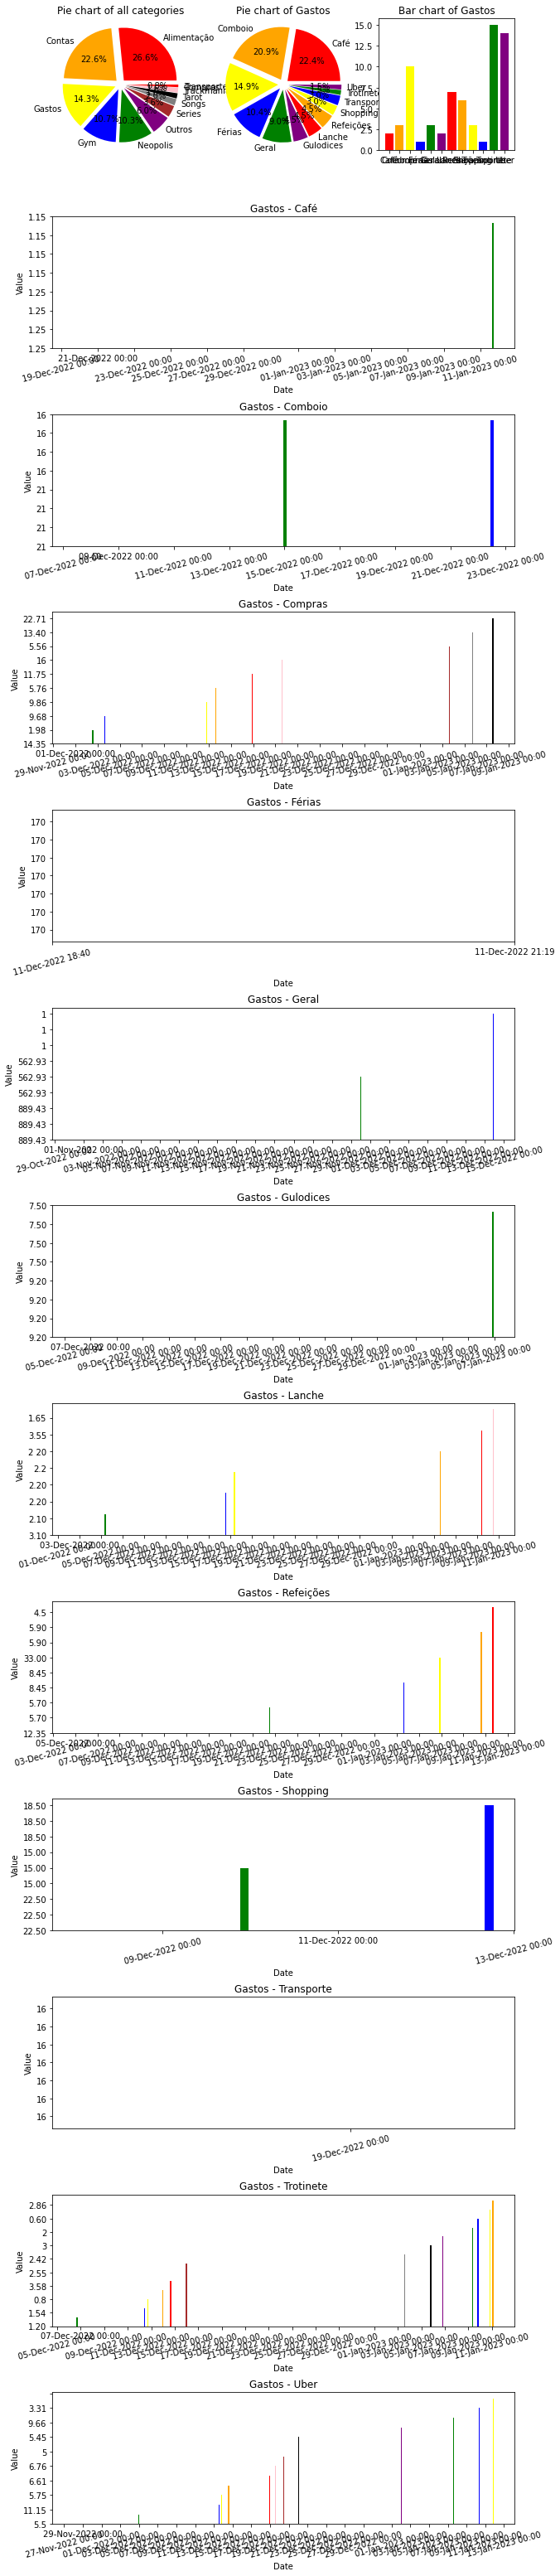

In [28]:
category = 'Gastos'
type_of = 'Rendas'


df_category = get_category_df(df_categories, category)
df_type = get_type_df(df_category, type_of)

types = df_category['Type'].unique()

print('Categories of', username,':\n', categories)
print('\nTypes of', category,':\n', df_category['Type'].unique())

plot_in_one(df_category, df_type,df, types)

In [29]:

print()
# df_category = df_category.loc[df_category['Date'] >= '2022-12-01']
total_sum = []
for each in types:
    df_type = get_type_df(df_category, each)
    type_sum = sum(df_type['Value'])
    total_sum.append(type_sum)

    print(category + ' ' + each + ': %.2f' % type_sum)

print('Total: %.2f' % sum(total_sum))

TypeError: unsupported operand type(s) for +: 'int' and 'str'